In [621]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [622]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configuración para mostrar todas las filas
pd.set_option('display.max_rows', None)

## Modelo univariado
variable x = LotArea, variable y = SalePrice

In [623]:
train_data=pd.read_csv("train.csv", encoding="latin1")
y = train_data.pop("SalePrice") #La variable respuesta
X = train_data.pop("OverallQual") 

xTrain, xTest, yTrain, yTest = train_test_split(X, y,test_size=0.3,train_size=0.7)

In [624]:
# EVALUANDO TRAIN Y TEST - Solo Selecciono una columna
price = yTrain.values.reshape(-1,1)
price_t = yTest.values.reshape(-1,1)
qual = xTrain.values.reshape(-1,1)
qual_t = xTest.values.reshape(-1,1)
lm = LinearRegression()
lm.fit(qual, price)
price_pred = lm.predict(qual_t)

### Ecuación

In [625]:
#y = mx + c
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'price_pred = %0.4f*qual % + 0.4f '%(m,c)
print(label)

price_pred = 44388.3946*qual -89685.4415 


Text(0.5, 1.0, 'Test set quality vs sale price')

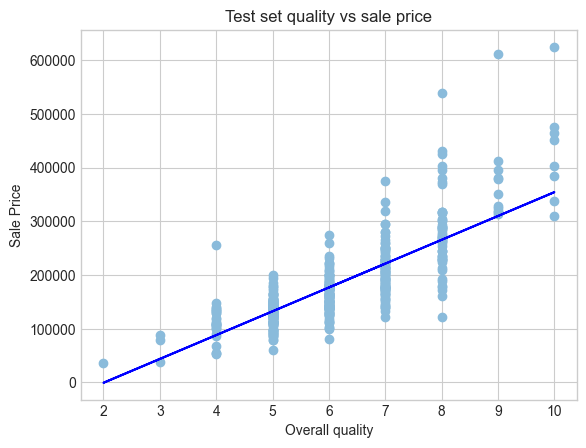

In [626]:
fig = plt.figure()
plt.scatter(qual_t, price_t) # Valor teórico (test)
plt.plot(qual_t, price_pred, color="blue") # valor predicho
plt.xlabel("Overall quality")
plt.ylabel("Sale Price")
plt.title("Test set quality vs sale price")

In [627]:
univariable_r2 = r2_score(price_t,price_pred)
univariable_mse = mean_squared_error(price_t,price_pred)
univariable_rmse = np.sqrt(univariable_mse)
print("R^2: %.2f"%univariable_r2)
print("MSE: %.2f"%univariable_mse)
print("RMSE: %.2f" %univariable_rmse)

R^2: 0.64
MSE: 2350108583.96
RMSE: 48477.92


### Residuales

In [628]:
residuales = price_t - price_pred

for i in range(0,len(price_t)):
    print(price_t[i], price_pred[i], " --> ", "\t\tDIFF:",residuales[i])

[229000] [221033.32078335]  -->  		DIFF: [7966.67921665]
[105000] [132256.53154648]  -->  		DIFF: [-27256.53154648]
[149000] [176644.92616492]  -->  		DIFF: [-27644.92616492]
[244000] [221033.32078335]  -->  		DIFF: [22966.67921665]
[380000] [309810.11002022]  -->  		DIFF: [70189.88997978]
[224500] [221033.32078335]  -->  		DIFF: [3466.67921665]
[254000] [265421.71540178]  -->  		DIFF: [-11421.71540178]
[55000] [87868.13692805]  -->  		DIFF: [-32868.13692805]
[145000] [132256.53154648]  -->  		DIFF: [12743.46845352]
[170000] [221033.32078335]  -->  		DIFF: [-51033.32078335]
[303477] [265421.71540178]  -->  		DIFF: [38055.28459822]
[208500] [221033.32078335]  -->  		DIFF: [-12533.32078335]
[107900] [87868.13692805]  -->  		DIFF: [20031.86307195]
[112000] [132256.53154648]  -->  		DIFF: [-20256.53154648]
[190000] [221033.32078335]  -->  		DIFF: [-31033.32078335]
[68500] [87868.13692805]  -->  		DIFF: [-19368.13692805]
[150750] [132256.53154648]  -->  		DIFF: [18493.46845352]
[395000] [26

In [629]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, price_pred)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = price_pred[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")


Índice: 21
Valor real: [611657]
Valor predicho: [309810.11002022]
Diferencia máxima: [301846.88997978]


Text(0, 0.5, 'Residuales')

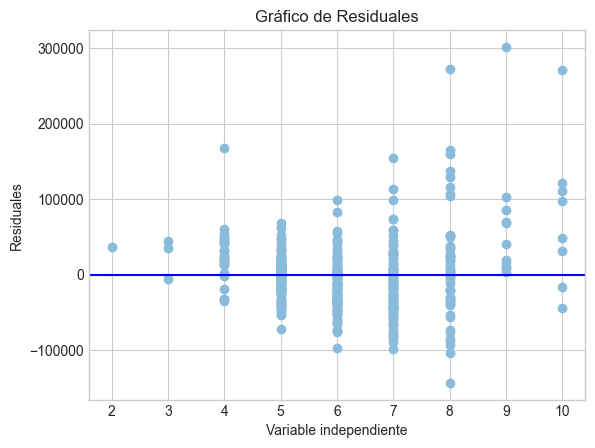

In [630]:
plt.plot(qual_t,residuales, 'o')
plt.axhline(0, color = "blue")
plt.title("Gráfico de Residuales")
plt.xlabel("Variable independiente")
plt.ylabel("Residuales")

## Modelo multivariable

Separación de variables numéricas

In [654]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_cuantitativas = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Quitar algunas columnas con impacto reducido
columnas_cuantitativas.remove("Id")
columnas_cuantitativas.remove("MSSubClass")
columnas_cuantitativas.remove("FullBath")
columnas_cuantitativas.remove("HalfBath")
columnas_cuantitativas.remove("BedroomAbvGr")
columnas_cuantitativas.remove("KitchenAbvGr")
columnas_cuantitativas.remove("TotRmsAbvGrd")
columnas_cuantitativas.remove("Fireplaces")
columnas_cuantitativas.remove("LotFrontage")
columnas_cuantitativas.remove("MasVnrArea")
columnas_cuantitativas.remove("GarageYrBlt")

_train = train_data[columnas_cuantitativas]

# Eliminar columnas que contienen NaN
_train = _train.dropna(axis=1)

print("Columnas usadas (" + str(len(_train.columns)) + ") :\n"+ str(_train.columns))

y = _train.pop("SalePrice")
X = _train

Columnas usadas (27) :
Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [655]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

#Normalización de datos
scalerA = StandardScaler()  # Crear el escalador

X_train_scaled = scalerA.fit_transform(X_train)
X_test_scaled = scalerA.transform(X_test)

(1021, 26)
(438, 26)
(1021,)
(438,)


In [656]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modelo1 = LinearRegression()
modelo1.fit(X_train_scaled, price)
y_pred_modelo1 = modelo1.predict(X_test_scaled)


### Ecuación

In [657]:
# Obtener coeficientes e intercepto
intercept = modelo1.intercept_[0]  # Intercepto
coefs = modelo1.coef_[0]  # Lista de coeficientes

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 181522.7767 + (4159.8591 * LotArea) + (27454.8060 * OverallQual) + (5000.3915 * OverallCond) + (9531.1310 * YearBuilt) + (3566.0757 * YearRemodAdd) + (4098.2808 * BsmtFinSF1) + (-1192.8080 * BsmtFinSF2) + (117.6705 * BsmtUnfSF) + (3856.3683 * TotalBsmtSF) + (10970.6615 * 1stFlrSF) + (6716.9111 * 2ndFlrSF) + (1489.5907 * LowQualFinSF) + (13829.4809 * GrLivArea) + (4352.0960 * BsmtFullBath) + (496.8657 * BsmtHalfBath) + (9054.4496 * GarageCars) + (2221.4761 * GarageArea) + (4594.6857 * WoodDeckSF) + (251.5902 * OpenPorchSF) + (1739.6138 * EnclosedPorch) + (676.1822 * 3SsnPorch) + (4062.1296 * ScreenPorch) + (-7560.8814 * PoolArea) + (-83.2419 * MiscVal) + (-1377.6315 * MoSold) + (-265.8736 * YrSold)


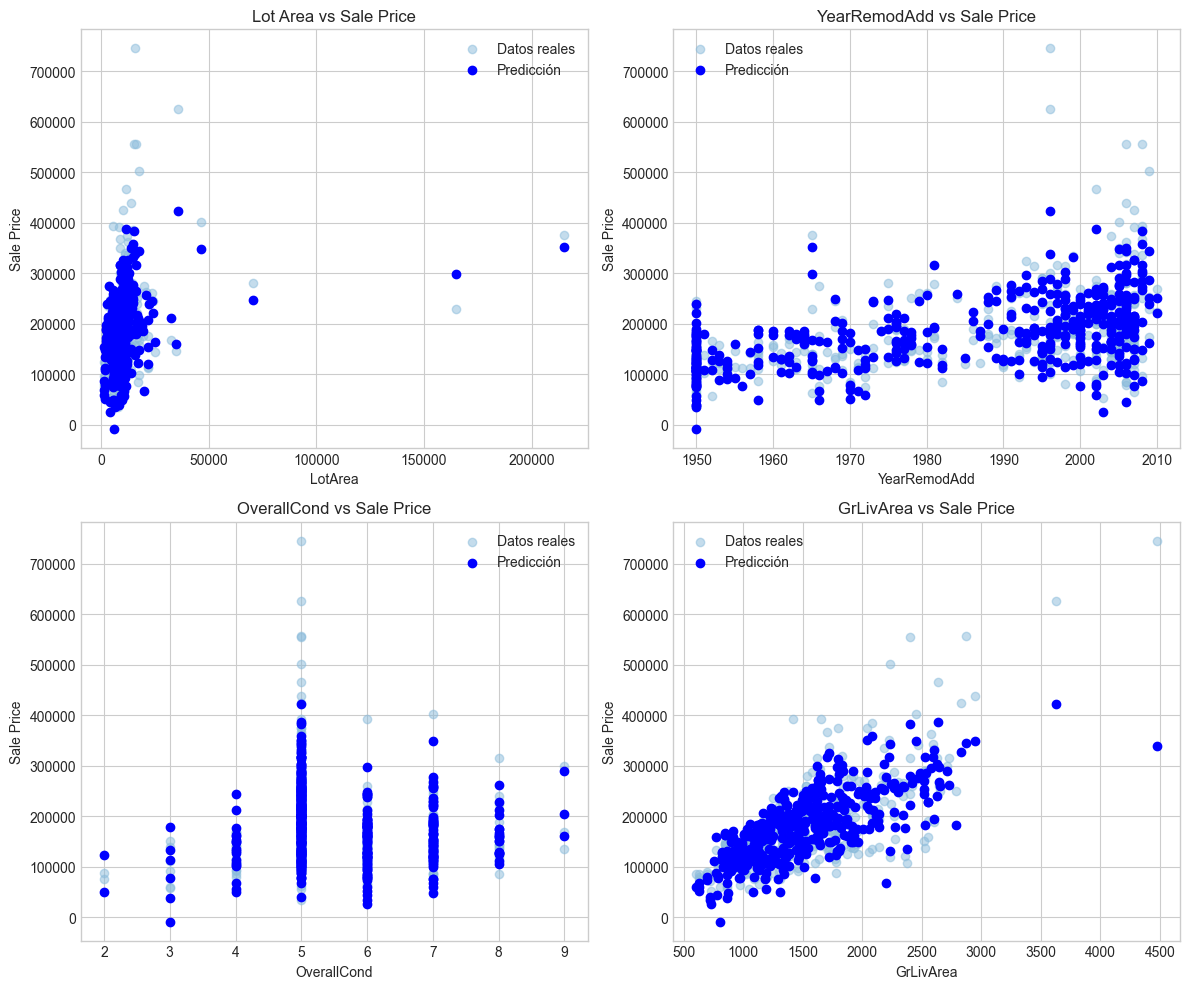

In [658]:
# Variables a graficar
variables = ["LotArea", "YearRemodAdd", "OverallCond", "GrLivArea"]
titles = ["Lot Area vs Sale Price", "YearRemodAdd vs Sale Price", 
          "OverallCond vs Sale Price", "GrLivArea vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], y_pred_modelo1, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [659]:
# Regression metrics
mse_modelo1=mean_squared_error(price_t, y_pred_modelo1) 
r2_modelo1=r2_score(y_test, y_pred_modelo1)
rmse_modelo1=np.sqrt(mse_modelo1)

print('R^2: ', round(r2_modelo1,4))
print('MSE: ', round(mse_modelo1,4))
print('RMSE: ', round(rmse_modelo1,4))

R^2:  0.7706
MSE:  1580045490.1482
RMSE:  39749.786


### Análisis de residuos

In [660]:
resid_modelo1=price_t-y_pred_modelo1
for i in range(0,len(price_t)):
    print(price_t[i], y_pred_modelo1[i], " --> ", "\t\tDIFF:",resid_modelo1[i])

[100000] [118477.99988414]  -->  		DIFF: [-18477.99988414]
[76500] [49078.77738301]  -->  		DIFF: [27421.22261699]
[269500] [250703.66027093]  -->  		DIFF: [18796.33972907]
[229000] [251788.36623422]  -->  		DIFF: [-22788.36623422]
[244000] [214282.58121937]  -->  		DIFF: [29717.41878063]
[183900] [198455.97400024]  -->  		DIFF: [-14555.97400024]
[172500] [238006.63339463]  -->  		DIFF: [-65506.63339463]
[126175] [104473.32697248]  -->  		DIFF: [21701.67302752]
[555000] [383069.01285196]  -->  		DIFF: [171930.98714804]
[125000] [125801.7796141]  -->  		DIFF: [-801.7796141]
[132500] [125570.4307941]  -->  		DIFF: [6929.5692059]
[87000] [123574.98460637]  -->  		DIFF: [-36574.98460637]
[112000] [129634.4707925]  -->  		DIFF: [-17634.4707925]
[745000] [338017.44236934]  -->  		DIFF: [406982.55763066]
[112500] [100118.34379079]  -->  		DIFF: [12381.65620921]
[151000] [174891.14654532]  -->  		DIFF: [-23891.14654532]
[127000] [126815.91736071]  -->  		DIFF: [184.08263929]
[107500] [135527.7

In [661]:
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo1)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo1[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 13
Valor real: [745000]
Valor predicho: [338017.44236934]
Diferencia máxima: [406982.55763066]


Text(0, 0.5, 'Residuales')

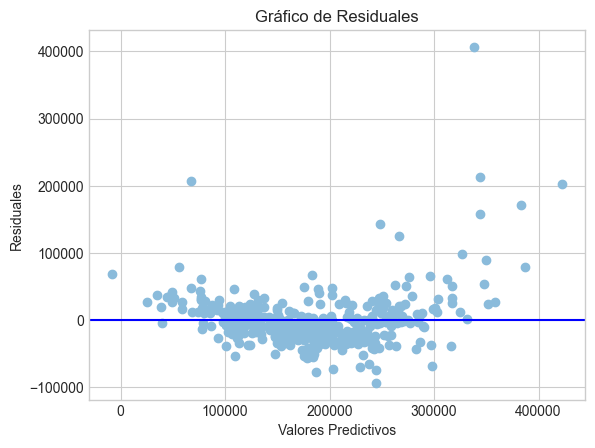

In [662]:
plt.scatter(y_pred_modelo1,resid_modelo1)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

## Nuevo modelo

Separación de variables a usar

In [640]:
train_data=pd.read_csv("train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath", "SalePrice"]

_train2 = train_data[columnas_aUsar]

print("Columnas usadas (" + str(len(_train2.columns)) + ") :\n"+ str(_train2.columns))

y = _train2.pop("SalePrice")
X = _train2

Columnas usadas (10) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath',
       'SalePrice'],
      dtype='object')


In [641]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Obtener los nombres de las variables independientes (columnas de X)
variables = X_train.columns

#Normalización de datos
scalerB = StandardScaler()  # Crear el escalador

X_train_scaled = scalerB.fit_transform(X_train)
X_test_scaled = scalerB.transform(X_test)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [642]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modelo2 = LinearRegression()
modelo2.fit(X_train_scaled, price)
y_pred_modelo2 = modelo2.predict(X_test_scaled)


### Ecuación

In [643]:
# Obtener coeficientes e intercepto
intercept = modelo2.intercept_[0]  # Intercepto
coefs = modelo2.coef_[0]  # Lista de coeficientes

# Construir la ecuación del modelo
equation = f"SalePrice = {intercept:.4f}"
for var, coef in zip(variables, coefs):
    equation += f" + ({coef:.4f} * {var})"

print(equation)

SalePrice = 180006.4006 + (28657.8071 * OverallQual) + (6348.1323 * OverallCond) + (9949.6177 * YearBuilt) + (6307.2336 * BsmtFullBath) + (9691.8770 * TotalBsmtSF) + (26803.8295 * GrLivArea) + (12268.8550 * GarageCars) + (3322.7514 * WoodDeckSF) + (-515.5080 * FullBath)


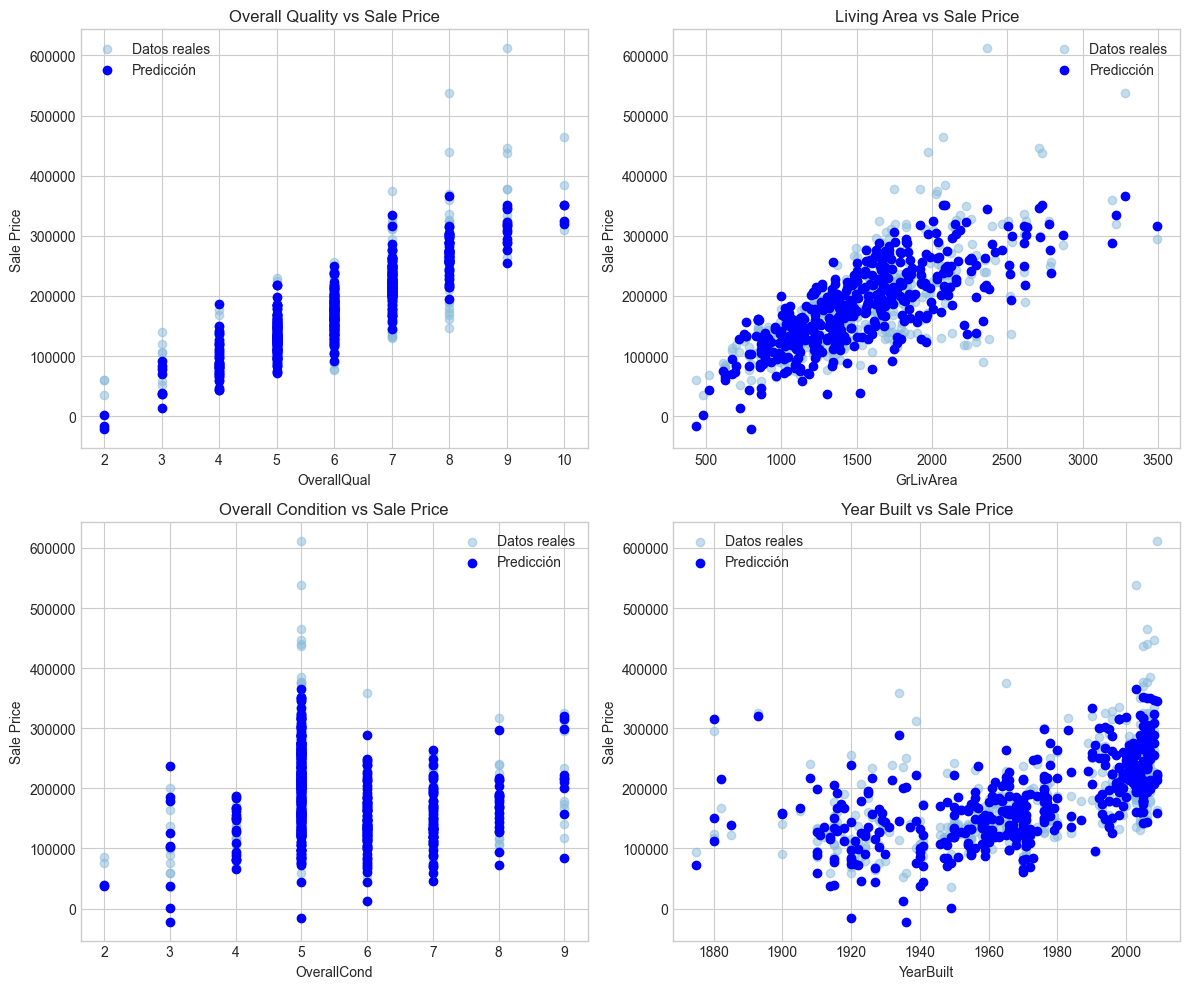

In [644]:
# Variables a graficar
variables = ["OverallQual", "GrLivArea", "OverallCond", "YearBuilt"]
titles = ["Overall Quality vs Sale Price", "Living Area vs Sale Price", 
          "Overall Condition vs Sale Price", "Year Built vs Sale Price"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas
axes = axes.ravel()  # Convierte la matriz de ejes en una lista

for i, var in enumerate(variables):
    axes[i].scatter(X_test[var], price_t, label="Datos reales", alpha=0.5)
    axes[i].scatter(X_test[var], y_pred_modelo2, color="blue", label="Predicción")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Sale Price")
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()  # Ajusta los gráficos para que no se superpongan
plt.show()

In [645]:
# Regression metrics
mse_modelo2=mean_squared_error(price_t, y_pred_modelo2) 
r2_modelo2=r2_score(y_test, y_pred_modelo2)
rmse_modelo2=np.sqrt(mse_modelo2)

print('R^2: ', round(r2_modelo2,4))
print('MSE: ', round(mse_modelo2,4))
print('RMSE: ', round(rmse_modelo2,4))

R^2:  0.82
MSE:  1043357521.4644
RMSE:  32301.0452


### Análisis de residuos

In [646]:
resid_modelo2=price_t-y_pred_modelo2
# Calcular las diferencias absolutas
differences = [abs(t - p) for t, p in zip(price_t, y_pred_modelo2)]

# Encontrar el índice con la diferencia máxima
max_index = differences.index(max(differences))

# Obtener los valores correspondientes
max_real_value = price_t[max_index]
max_pred_value = y_pred_modelo2[max_index]
max_difference = differences[max_index]

print(f"Índice: {max_index}")
print(f"Valor real: {max_real_value}")
print(f"Valor predicho: {max_pred_value}")
print(f"Diferencia máxima: {max_difference}")

Índice: 119
Valor real: [611657]
Valor predicho: [344802.33761146]
Diferencia máxima: [266854.66238854]


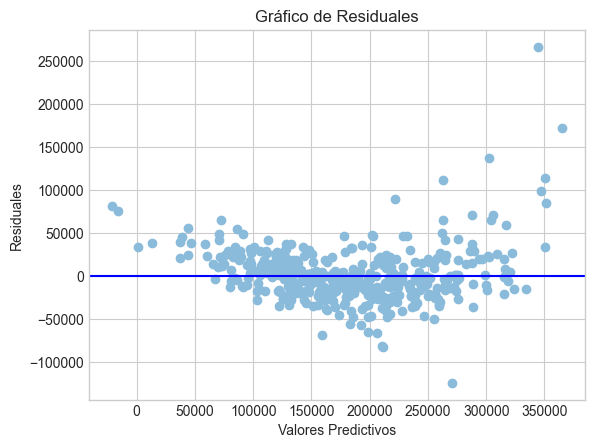

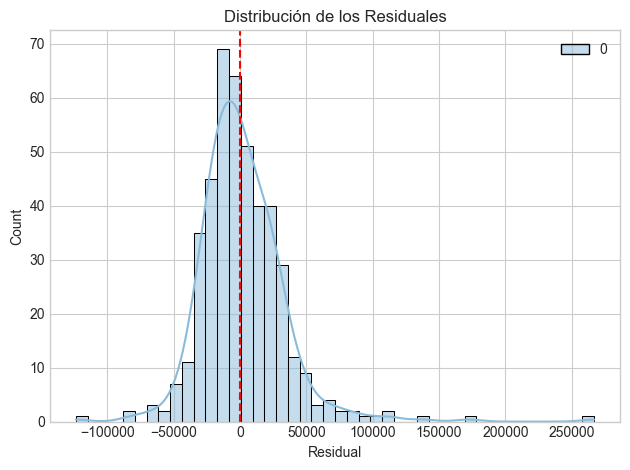

In [647]:
plt.scatter(y_pred_modelo2,resid_modelo2)
plt.axhline(0,color='blue')
plt.title("Gráfico de Residuales")
plt.xlabel('Valores Predictivos')
plt.ylabel('Residuales')

# Distribución de los residuales
plt.figure()
sns.histplot(resid_modelo2, kde=True)
plt.title('Distribución de los Residuales')
plt.xlabel('Residual')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()

## Data Set de prueba

In [ ]:
test_data=pd.read_csv("test.csv", encoding="latin1")

Prueba con el modelo univariado

In [649]:
quality_t = test_data["OverallQual"]
quality_t = quality_t.values.reshape(-1,1)
price_pred2 = lm.predict(quality_t)

# Guardar los IDs
test_ids = test_data["Id"]

# Unir los IDs con las predicciones
resultados = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred2.flatten()})

# Mostrar las primeras filas
print(resultados.head(10))  # Muestra los primeros 10 resultados

     Id      SalePrice
0  1461  132256.531546
1  1462  176644.926165
2  1463  132256.531546
3  1464  176644.926165
4  1465  265421.715402
5  1466  176644.926165
6  1467  176644.926165
7  1468  176644.926165
8  1469  221033.320783
9  1470   87868.136928


Prueba con el modelo de variables numericas

In [ ]:
quality_t = test_data[_train.columns]

# Eliminar filas con NaN basándonos en quality_t y asegurando que price_theory tenga los mismos índices
valid_indices = quality_t.dropna().index

quality_t = quality_t.loc[valid_indices]  # Mantener solo los índices válidos en X

X_test_scaled = scalerA.transform(quality_t)  

# Hacer predicciones con el modelo
price_pred2 = modelo1.predict(X_test_scaled)

# Guardar los IDs
test_ids = test_data["Id"].loc[valid_indices]

# Unir los IDs con las predicciones
resultados = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred2.flatten()})

# Mostrar las primeras filas
print(resultados.head(10))  # Muestra los primeros 10 resultados



     Id      SalePrice
0  1461  125340.879704
1  1462  167852.645568
2  1463  189114.612150
3  1464  203480.714491
4  1465  208672.923411
5  1466  173303.659791
6  1467  198432.756221
7  1468  160553.517480
8  1469  203143.307229
9  1470  107697.302792


Prueba con el último modelo

In [ ]:
quality_t = test_data[_train2.columns]

# Eliminar filas con NaN basándonos en quality_t
valid_indices = quality_t.dropna().index

quality_t = quality_t.loc[valid_indices]  # Mantener solo los índices válidos en X

X_test_scaled = scalerB.transform(quality_t)  

# Hacer predicciones con el modelo
price_pred2 = modelo2.predict(X_test_scaled)

# Guardar los IDs
test_ids = test_data["Id"].loc[valid_indices]

# Unir los IDs con las predicciones
resultados = pd.DataFrame({'Id': test_ids, 'SalePrice': price_pred2.flatten()})

# Mostrar las primeras filas
print(resultados.head(10))  # Muestra los primeros 10 resultados


     Id      SalePrice
0  1461  105314.209135
1  1462  163062.953830
2  1463  166938.570751
3  1464  196606.695390
4  1465  212571.922623
5  1466  182934.573062
6  1467  200076.406441
7  1468  171544.815265
8  1469  212639.560994
9  1470  112352.875171


## Comparación final

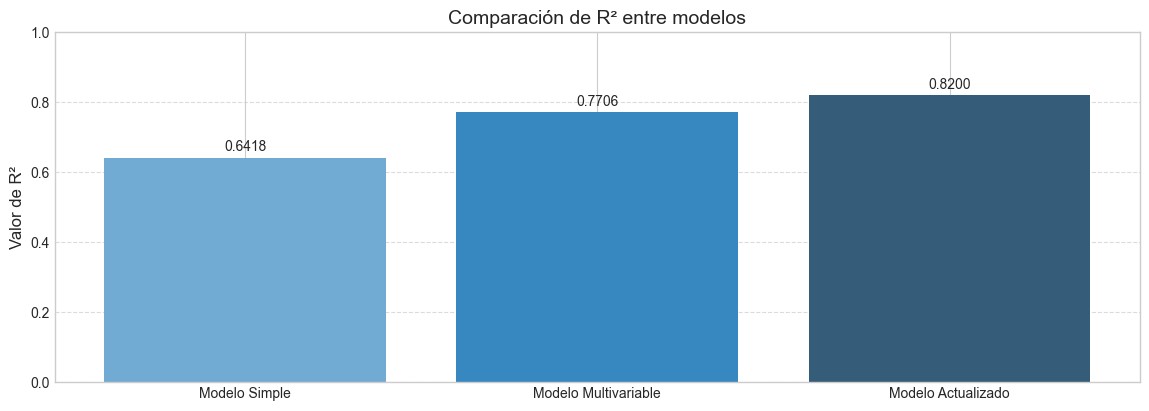

In [663]:
# Definir los datos para los tres modelos
modelos = ['Modelo Simple', 'Modelo Multivariable', 'Modelo Actualizado']

# R² de los tres modelos (reemplaza estos valores con tus datos reales)
r2_scores = [univariable_r2, r2_modelo1, r2_modelo2]  # Ejemplo: valores de R² para cada modelo

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Blues_d")
plt.figure(figsize=(14, 10))

# Gráfico 1: Comparación de R²
plt.subplot(2, 1, 1)
bars = plt.bar(modelos, r2_scores, color=sns.color_palette("Blues_d", 3))

# Añadir etiquetas con valores
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

plt.title('Comparación de R² entre modelos', fontsize=14)
plt.ylabel('Valor de R²', fontsize=12)
plt.ylim(0, 1)  # R² generalmente está entre 0 y 1
plt.grid(axis='y', linestyle='--', alpha=0.7)


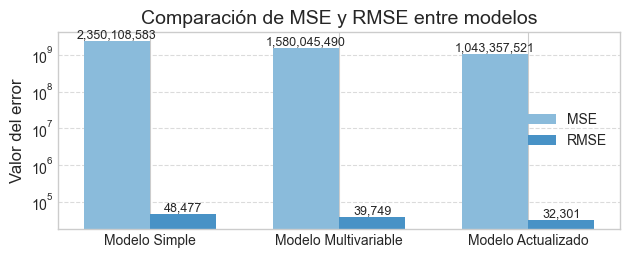

In [664]:
# Gráfico 2: Comparación de MSE y RMSE
plt.subplot(2, 1, 2)

# MSE y RMSE para los tres modelos (reemplaza estos valores con tus datos reales)
mse_scores = [univariable_mse, mse_modelo1, mse_modelo2]
rmse_scores = [univariable_rmse, rmse_modelo1, rmse_modelo2]

# Crear posiciones para las barras agrupadas
x = np.arange(len(modelos))
width = 0.35

# Graficar MSE y RMSE
bars1 = plt.bar(x - width/2, mse_scores, width, label='MSE', color=sns.color_palette("Blues_d")[0])
bars2 = plt.bar(x + width/2, rmse_scores, width, label='RMSE', color=sns.color_palette("Blues_d")[2])

# Añadir etiquetas con valores
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{int(height):,}', ha='center', va='bottom', rotation=0, fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{int(height):,}', ha='center', va='bottom', rotation=0, fontsize=9)

plt.title('Comparación de MSE y RMSE entre modelos', fontsize=14)
plt.ylabel('Valor del error', fontsize=12)
plt.xticks(x, modelos)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar la escala logarítmica por la diferencia entre MSE y RMSE
plt.yscale('log')

plt.tight_layout()
plt.show()